# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

In [1]:
# reload the parser - this runs without a reset
%run aggregate/parser.py

time: 78 ms (started: 2022-10-24 21:46:54 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [3]:
%run -i snippets.py h

Select options from:
    parse_test_1
    parse_test_2
    reinsurance
    scratch
    scratch_ex
    parse_builder
    parse_test
    netters_and_ceders
    simple_discrete
    hu_scs_case
    sev_intro
    easter_egg.

Select no options just to import build etc.
time: 109 ms (started: 2022-10-24 21:47:23 +01:00)


In [85]:
# run with no args this just loads libraries etc. 
%run -i snippets.py reinsurance

49:07.656|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.6680472308365776 shape from sev_cv 0.75
49:07.657|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=10.0 and sev_loc=0


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,5.463,-453.641m,747.959m,668.367m,-106.413m,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,27.314,-453.641m,558.470m,537.906m,-36.822m,861.234m


ceded                                          \
                                 ex       var        sd        cv      skew   
kind share limit   attach                                                     
occ  2.5    5.000  0.0        2.325  153.032m  391.193m  168.239m    -2.387   
     5.0    15.000 5.0        1.556     2.680     1.637     1.052  905.372m   
     30.0   30.000 20.0    668.923m     9.823     3.134     4.685     6.266   
     all   inf     gup        4.550    18.041     4.248  933.510m     4.144   

                             net                                 subject  \
                              ex     var     sd        cv   skew      ex   
kind share limit   attach                                                  
occ  2.5    5.000  0.0     7.677  53.550  7.318  953.194m  2.721   9.999   
     5.0    15.000 5.0     8.453  36.573  6.048  715.421m  3.472   9.999   
     30.0   30.000 20.0    9.330  29.652  5.445  583.663m  1.041   9.999   
     all   inf     gup     5.463  13.331  3.651  668.367m  1.688   9.999   

                                                           
                              var     sd        cv   skew  
kind share limit   attach                                  
occ  2.5    5.000  0.0     55.928  7.479  747.960m  2.562  
     5.0    15.000 5.0     55.928  7.479  747.960m  2.562  
     30.0   30.000 20.0    55.928  7.479  747.960m  2.562  
     all   inf     gup     55.928  7.479  747.960m  2.562

49:07.997|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.6680472308365776 shape from sev_cv 0.75
49:07.998|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=10.0 and sev_loc=0


Occurrence only
Reinsurance: net of 2.50 part of 5.00 xs 0.00 and 5.00 part of 15.00 xs 5.00 and 30.00 xs 20.00 per occurrence


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,9.999,-6.894n,747.959m,747.960m,746.283n,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,12.651,-746.938m,558.470m,514.201m,-79.269m,861.234m


ceded                                       \
                                 ex      var      sd        cv      skew   
kind share limit   attach                                                  
agg  12.5   25.000 0.0        4.809    8.980   2.997  623.095m     1.051   
     75.0   75.000 25.0    394.908m    7.827   2.798     7.085    11.519   
     all   inf     gup       37.344  580.028  24.084  644.913m  530.490m   

                              net                                 subject  \
                               ex     var     sd        cv   skew      ex   
kind share limit   attach                                                   
agg  12.5   25.000 0.0      5.204  22.882  4.783  919.155m  4.723   9.999   
     75.0   75.000 25.0     9.604  35.940  5.995  624.246m  1.052   9.999   
     all   inf     gup     12.651  42.319  6.505  514.201m  6.534  49.992   

                                                                
                               var      sd        cv      skew  
kind share limit   attach                                       
agg  12.5   25.000 0.0      55.928   7.479  747.960m     2.562  
     75.0   75.000 25.0     55.928   7.479  747.960m     2.562  
     all   inf     gup     779.311  27.916  558.416m  859.639m

49:08.334|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.6680472308365776 shape from sev_cv 0.75
49:08.335|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=10.0 and sev_loc=0


Aggregate only
Reinsurance: net of 12.50 part of 25.00 xs 0.00 and 75.00 xs 25.00 in the aggregate.


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.999,5.463,-453.641m,747.959m,668.367m,-106.413m,2.562
Freq,5.000,,,447.214m,,,447.214m
Agg,49.993,10.192,-796.131m,558.470m,318.301m,-430.048m,861.234m


ceded                                          \
                                  ex       var        sd        cv      skew   
kind share limit    attach                                                     
occ  2.5    5.000   0.0        2.325  153.032m  391.193m  168.239m    -2.387   
     5.0    15.000  5.0        1.556     2.680     1.637     1.052  905.372m   
     30.0   30.000  20.0    668.923m     9.823     3.134     4.685     6.266   
     all   inf      gup        4.550    18.041     4.248  933.510m     4.144   
agg  12.5   25.000  0.0        4.809     8.980     2.997  623.095m     1.051   
     100.0  100.000 25.0    394.908m     7.827     2.798     7.085    11.519   
     all   inf      gup       17.129   152.075    12.332  719.922m     1.343   

                               net                                 subject  \
                                ex     var     sd        cv   skew      ex   
kind share limit    attach                                                   
occ  2.5    5.000   0.0      7.677  53.550  7.318  953.194m  2.721   9.999   
     5.0    15.000  5.0      8.453  36.573  6.048  715.421m  3.472   9.999   
     30.0   30.000  20.0     9.330  29.652  5.445  583.663m  1.041   9.999   
     all   inf      gup      5.463  13.331  3.651  668.367m  1.688   9.999   
agg  12.5   25.000  0.0      5.204  22.882  4.783  919.155m  4.723   9.999   
     100.0  100.000 25.0     9.604  35.940  5.995  624.246m  1.052   9.999   
     all   inf      gup     10.192  10.524  3.244  318.301m -1.281  27.314   

                                                                 
                                var      sd        cv      skew  
kind share limit    attach                                       
occ  2.5    5.000   0.0      55.928   7.479  747.960m     2.562  
     5.0    15.000  5.0      55.928   7.479  747.960m     2.562  
     30.0   30.000  20.0     55.928   7.479  747.960m     2.562  
     all   inf      gup      55.928   7.479  747.960m     2.562  
agg  12.5   25.000  0.0      55.928   7.479  747.960m     2.562  
     100.0  100.000 25.0     55.928   7.479  747.960m     2.562  
     all   inf      gup     215.866  14.692  537.906m  730.968m

Occurrence and aggregate
Reinsurance: net of 2.50 part of 5.00 xs 0.00 and 5.00 part of 15.00 xs 5.00 and 30.00 xs 20.00 per occurrence then net of 12.50 part of 25.00 xs 0.00 and 100.00 xs 25.00 in the aggregate.
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!
REMEMBER: inf limit NYI!!

time: 1.09 s (started: 2022-10-21 22:49:07 +01:00)


In [ ]:
# show grammar 
print(agg.grammar())

# Parse Tests

In [ ]:
%run -i snippets.py

In [ ]:
logger_level(30)
# a = build.interpreter_line('sev TEST1 [10] @ lognorm [.5]', debug=True)
# display(a)
a = build.interpreter_line('sev TEST1 10 @ lognorm .5', debug=True)
# display(a)
# a = build.interpreter_line('agg TEST 1 claim sev  [lognorm expon] [2 1] wts=2 # 4  fixed', debug=True)
# a = build.interpreter_line('agg TEST 1 claim sev 10 @ expon  fixed', debug=True)
a#.loc['one off', 'output']

In [ ]:
logger_level(41)
build('sev One dsev [1]')
build.interpreter_line('agg FreqBinomial 10 claims sev sev.One binomial 0.5', debug=True)

In [ ]:
# debug_build('agg parsetest1 -+-5 claims sev gamma 13.9 cv .5 poisson', log_level=10)
# debug_build('agg Simple4 dfreq [1 2 3] [0.5 1/4 1/4] dsev [1 2 10] [.4 .4 .2] ', log_level=10)
# debug_build('agg AggTest: 1 claim sev 50 * beta 3 2 + 10 fixed', log_level=10)
# debug_build('agg AggTest: 1 claim sev 1 * beta 3 2  fixed', log_level=10)
# debug_build('agg AggTest: 1 claim sev expon fixed', log_level=10)
# debug_build('sev One dsev [1]')
# debug_build('agg AggTest: 1 claim sev.One fixed', log_level=10)
# debug_build('agg AggTest: 1 claim sev sev.One fixed', log_level=10)
debug_build('agg AggTest 1 claim dsev [1] mixed gamma .5 zt', log_level=10)

In [5]:
%run -i snippets.py parse_test_1

ACTIVATING parse_test_1 SECTION __main__ ===========================
ERRORS


,kind,error,name,output,preprocessed program,program
index,,,,,,
math6,--2**(-3),1,parse error,>>>--2**(-3),--2**(-3),same
math7,--2**(-3),1,parse error,>>>--2**(-3) / exp(1.5),--2**(-3) / exp(1.5),same
Comment3,agg,1,parse error,agg Test3 1 claim sev lognorm 3 cv .3 poisson >>>note{fails: comment in note,agg Test3 1 claim sev lognorm 3 cv .3 poisson note{fails: comment in note,agg Test3 1 claim sev lognorm 3 cv .3 poisson note{fails: comment in note //...


PASSES


,kind,error,name,output,preprocessed program,program
index,,,,,,
math0,expr,0,-1.0,-1.000,-1,same
math1,expr,0,1.24e-05,12.400u,1.24E-05,same
math2,expr,0,123000.0,123.000k,1.23E+05,same
math3,expr,0,-1.23,-1.230,-1.23E+00,same
math4,expr,0,1230.766,1.231k,1230.766,same
math5,expr,0,1000000.0,1.000M,1.00E+06,same
simple1,agg,0,Simple1,"{'name': 'Simple1', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [1....",agg Simple1 dfreq [1] dsev [0 1] note{toss of a single coin},same
simple2,agg,0,Simple2,"{'name': 'Simple2', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': [1...",agg Simple2 dfreq [12] dsev [0 1] note{toss of 12 single coins},same
simple3,agg,0,Simple3,"{'name': 'Simple3', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], 'fr...","agg Simple3 dfreq [1 2 3] dsev [1 2 10] note{1, 2 or 3 claims, sev 1, 2,...",same


time: 281 ms (started: 2022-10-24 21:48:27 +01:00)


In [ ]:
logger_level(40)
%run -i snippets.py parse_test_2

In [ ]:
display(df0[['program', 'log2', 'bs',
                'agg_m',
                 'emp_m',
                 'agg_cv',
                 'emp_cv',
                 'agg_sd',
                 'emp_sd']]) # .query('abs(agg_m - emp_m) > 1.e-2'))

# Reinsurance

In [ ]:
logger_level(10)
%run -i snippets.py reinsurance

# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [1]:
logger_level(30)
%run -i snippets.py 
# %run -i snippets.py parse_tests

time: 703 ms (started: 2022-10-21 22:19:32 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [3]:
a = build.write('port newco  agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed agg Cat 1 claim sev lognorm  500 cv 0.500 fixed')

19:33.824|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 399.99999999999994 shape from sev_cv 0.05
19:33.826|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=27000.0 and sev_loc=0
19:33.999|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.47238072707743883 shape from sev_cv 0.5
19:34.000|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=500.0 and sev_loc=0
19:34.264| 845|WARNING   | aggregate.utilities, static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | encountered zero mean, called with 0.0, 0.0, 0.0
19:34.272| 845|WARNING   | aggregate.utilities, static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | encountered zero mean, called with 0.0, 0.0, 0.0
19:34.278| 845|WARNING   | aggregate.utilities, static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | encountered zero mean, called with 0.0, 0.0, 0.0
19:34.294|2231|WARNI

time: 782 ms (started: 2022-10-21 22:19:33 +01:00)


In [4]:
port = a[('port', 'newco')][0]

time: 0 ns (started: 2022-10-21 22:19:34 +01:00)


In [7]:
type(port), isinstance(port, agg.Portfolio)

(aggregate.portfolio.Portfolio, True)

time: 0 ns (started: 2022-10-21 22:20:08 +01:00)


In [23]:
from aggregate import Portfolio

time: 0 ns (started: 2022-10-21 22:19:21 +01:00)


In [12]:
port.bs

1.0

time: 0 ns (started: 2022-10-21 22:21:04 +01:00)


In [21]:
type(port)

aggregate.portfolio.Portfolio

time: 0 ns (started: 2022-10-21 22:19:14 +01:00)


In [24]:
isinstance(port, Portfolio)

False

time: 0 ns (started: 2022-10-21 22:19:24 +01:00)


In [13]:
a[('port', 'newco')][0]

<aggregate.portfolio.Portfolio object at 0x0000016084F54250>, { 'name': 'newco', 'spec': [{'name': 'NonCatAndReserves', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'Cat', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 1.0, "log2": 16, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": False, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 31 ms (started: 2022-10-21 22:21:10 +01:00)


In [4]:
build._knowledge

spec  \
kind name                                                                                                 
agg  NonCatAndReserves  {'name': 'NonCatAndReserves', 'exp_en': 1.0, 'sev_name': 'gamma', 'sev_mean'...   
     Cat                {'name': 'Cat', 'exp_en': 1.0, 'sev_name': 'lognorm', 'sev_mean': 500.0, 'se...   
port newco                                           {'spec': ['NonCatAndReserves', 'Cat'], 'note': ''}   

                                                                                                program  
kind name                                                                                                
agg  NonCatAndReserves                                                                                   
     Cat                                                                                                 
port newco              port newco  agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed agg ...

time: 16 ms (started: 2022-10-21 22:08:39 +01:00)


In [4]:
build._knowledge

spec  \
kind name                                                                                                 
agg  NonCatAndReserves  {'name': 'NonCatAndReserves', 'exp_en': 1.0, 'sev_name': 'gamma', 'sev_mean'...   
     Cat                {'name': 'Cat', 'exp_en': 1.0, 'sev_name': 'lognorm', 'sev_mean': 500.0, 'se...   
port newco                                           {'spec': ['NonCatAndReserves', 'Cat'], 'note': ''}   

                                                                                                program  
kind name                                                                                                
agg  NonCatAndReserves                                                                                   
     Cat                                                                                                 
port newco              port newco  agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed agg ...

time: 0 ns (started: 2022-10-21 21:51:03 +01:00)


In [14]:
build['NonCatAndReserves']

('agg',
 'NonCatAndReserves',
 {'name': 'NonCatAndReserves',
  'exp_en': 1.0,
  'sev_name': 'gamma',
  'sev_mean': 27000.0,
  'sev_cv': 0.05,
  'sev_wt': 1,
  'freq_name': 'fixed',
  'note': ''},
 '')

time: 0 ns (started: 2022-10-21 22:21:44 +01:00)


In [16]:
porta = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1, create_all=False)

portb = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2, create_all=False)

22:03.803|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 399.99999999999994 shape from sev_cv 0.05
22:03.805|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=27000.0 and sev_loc=0
22:03.975|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.47238072707743883 shape from sev_cv 0.5
22:03.975|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=500.0 and sev_loc=0
22:05.435|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 10000.0 shape from sev_cv 0.01
22:05.436|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=27000.0 and sev_loc=0
22:05.595|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.47238072707743883 shape from sev_cv 0.5
22:05.595|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=500.0 and sev_loc=0


time: 3.31 s (started: 2022-10-21 22:22:03 +01:00)


In [17]:
porta

Non-Portfolio (enhanced) object { "name": "newco", 'spec': [{'name': 'NonCatAndReserves', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'Cat', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 1, "log2": 17, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 31 ms (started: 2022-10-21 22:22:11 +01:00)


In [15]:
build('port newco2 agg.Cat agg.NonCatAndReserves')

21:45.526|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.47238072707743883 shape from sev_cv 0.5
21:45.527|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=500.0 and sev_loc=0
21:45.744|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 399.99999999999994 shape from sev_cv 0.05
21:45.745|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=27000.0 and sev_loc=0


Non-Portfolio (enhanced) object { "name": "newco2", 'spec': [{'name': 'Cat', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'NonCatAndReserves', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 5.0, "log2": 13, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 656 ms (started: 2022-10-21 22:21:45 +01:00)


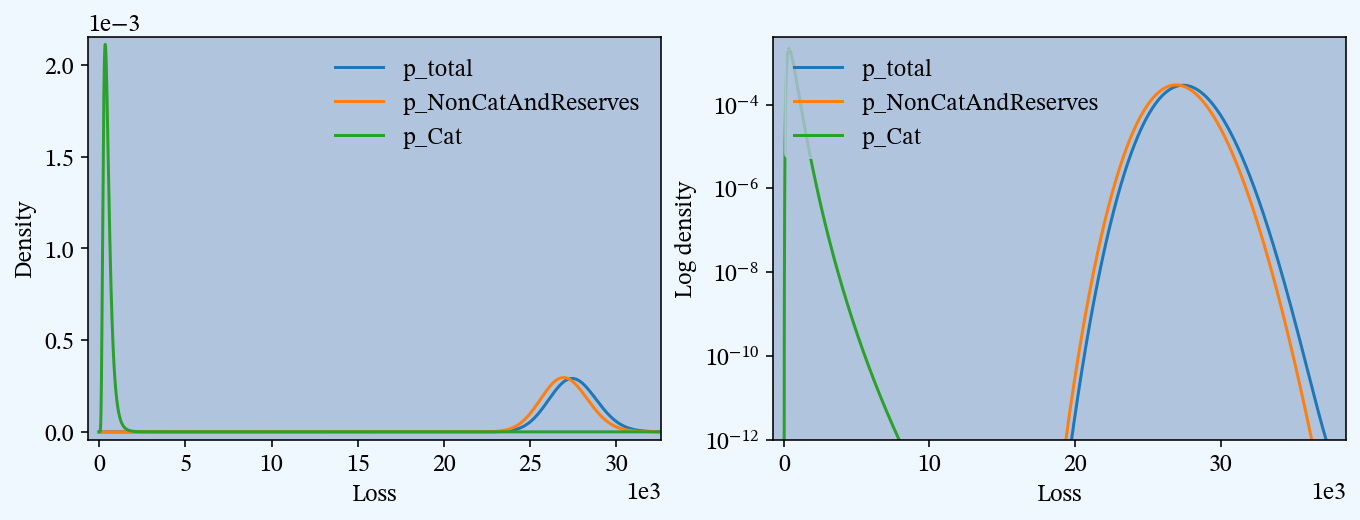

time: 2.52 s (started: 2022-10-21 22:22:16 +01:00)


In [18]:
porta.plot()

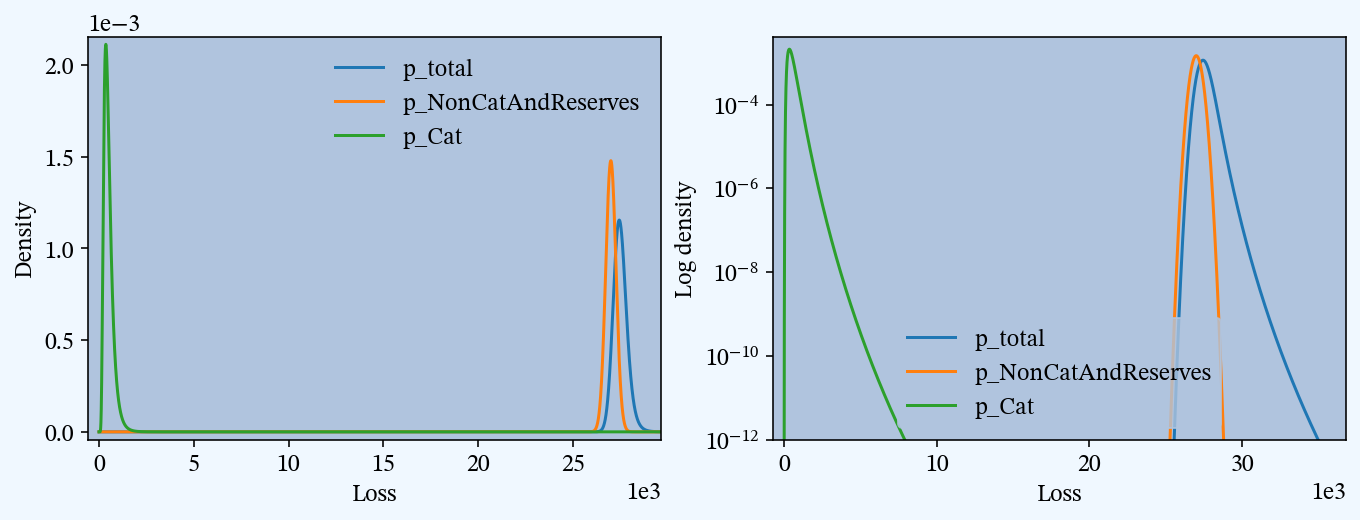

time: 2.27 s (started: 2022-10-21 22:22:19 +01:00)


In [19]:
portb.plot()

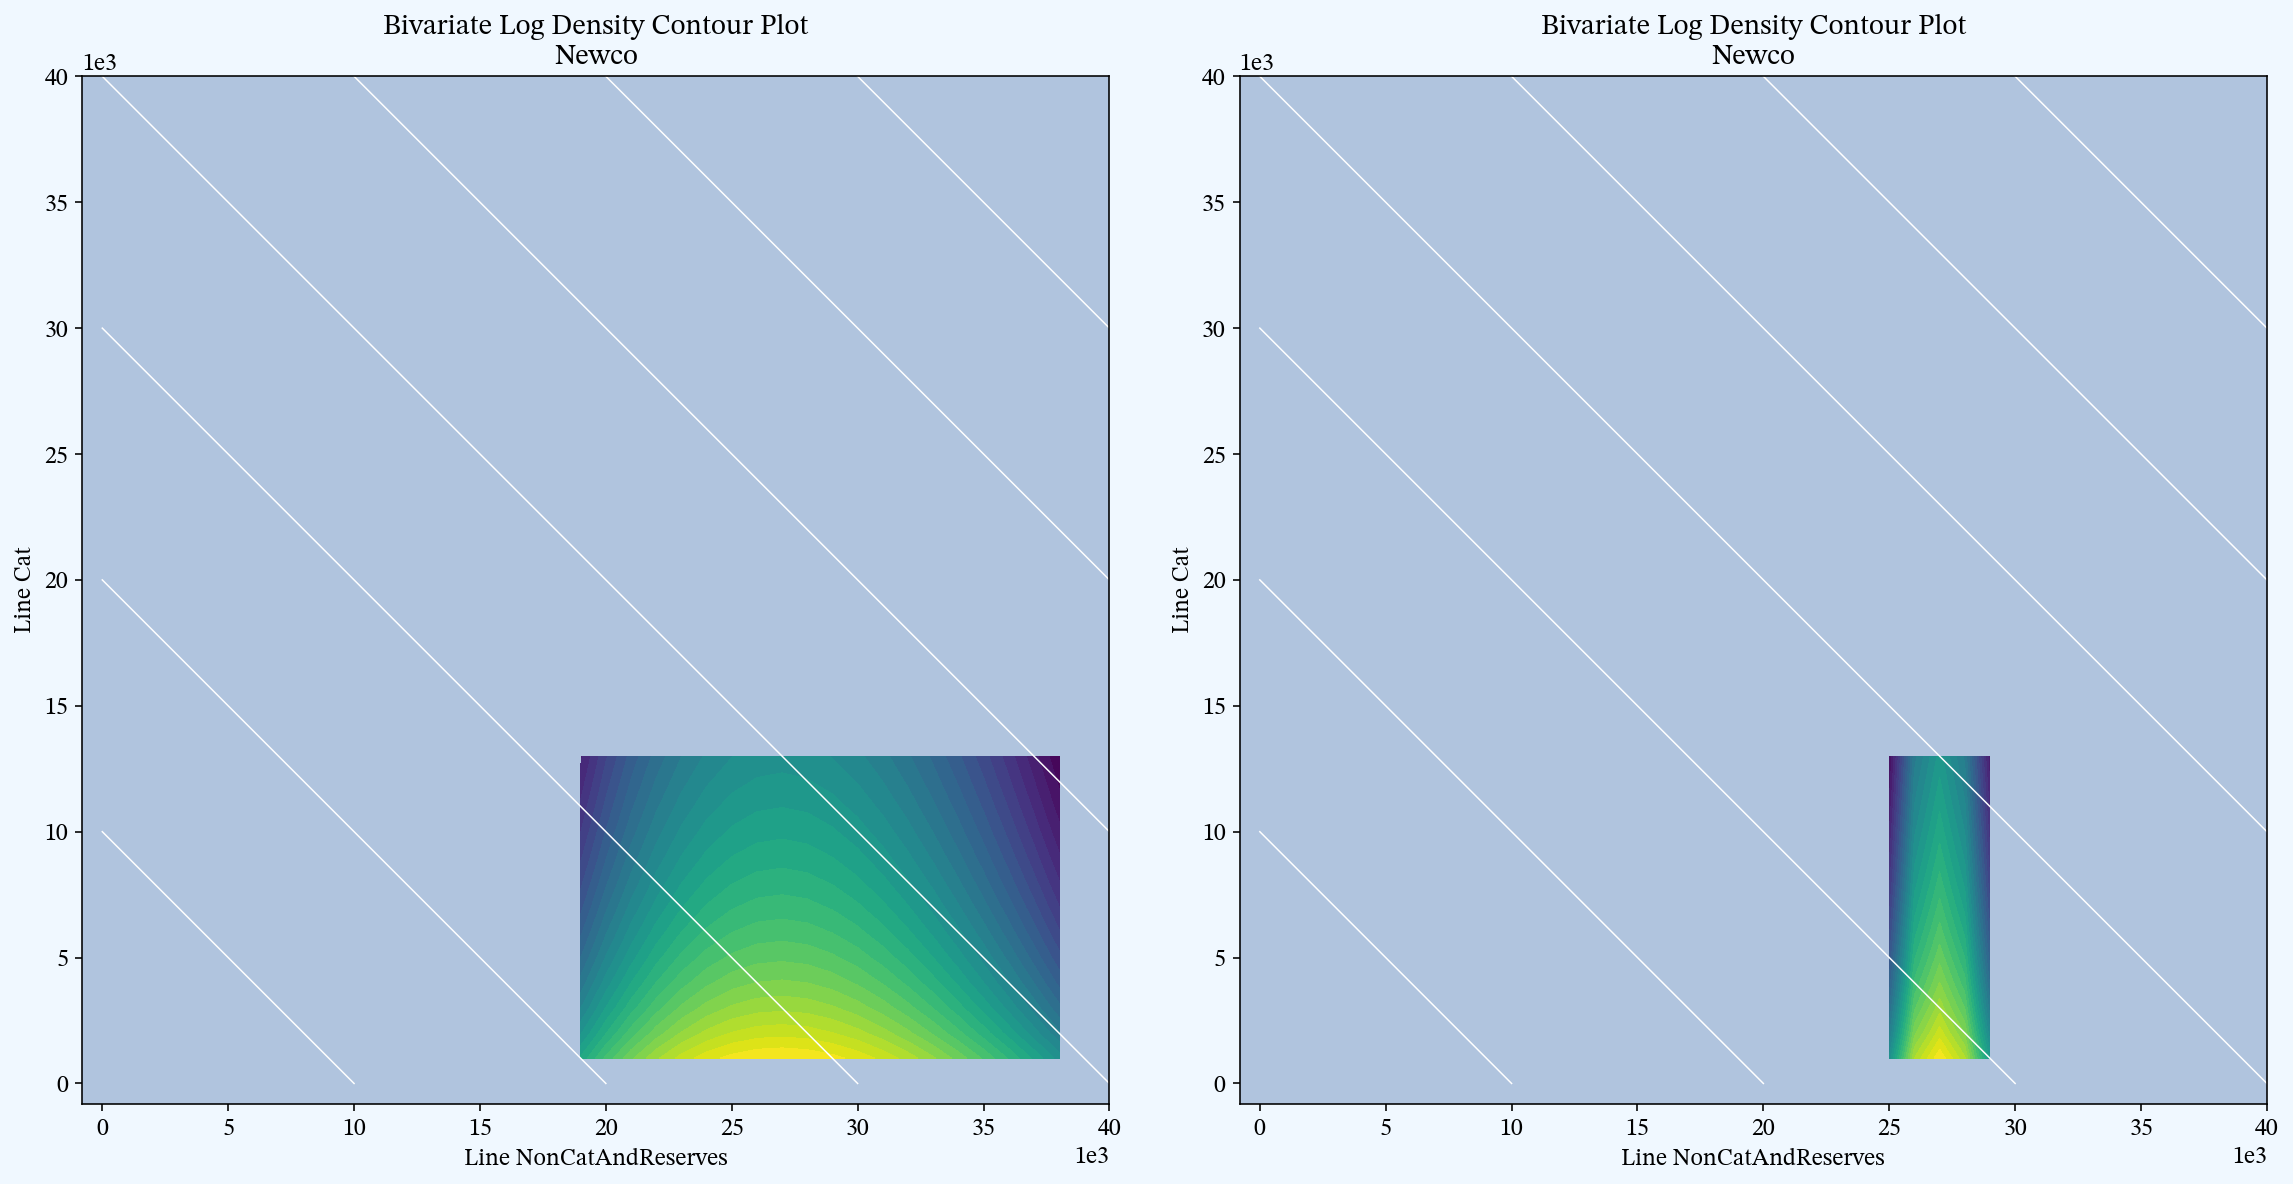

time: 547 ms (started: 2022-10-21 22:22:21 +01:00)


In [20]:
%%sf 1 2 8 8 
porta.biv_contour_plot(f, ax0, 0, 40e3, 1e3, cmap='viridis')
portb.biv_contour_plot(f, ax1, 0, 40e3, 1e3, cmap='viridis')

## Cat / Non-Cat Capital Model Case: New Syntax

In [ ]:
logger_level(30)
%run -i snippets.py

In [21]:
prog_noncat = 'agg NC 1 claim sev gamma 6840 cv 0.037 + 19500 fixed'
noncat = build(prog_noncat)
noncat.report_df

22:34.573|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 730.4601899196495 shape from sev_cv 0.037
22:34.573|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=6840.0 and sev_loc=19500.0


view,0,independent,mixed,empirical,error
statistic,,,,,
name,NC,NC,NC,,
limit,inf,inf,inf,,
attachment,0,0.000,0.000,,
el,26.340k,26.340k,26.340k,,
freq_m,1.000,1.000,1.000,,
freq_cv,0.000,0.000,0.000,,
freq_skew,,,,,
sev_m,26.340k,26.340k,26.340k,26.340k,-549.449f
sev_cv,9.608m,9.608m,9.608m,9.608m,16.261u


time: 188 ms (started: 2022-10-21 22:22:34 +01:00)


In [22]:
prog_cat_gross = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.4'
cat = build(prog_cat_gross, log2=18, bs=1)
cat.report_df

33:56.331|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.165508111353308 shape from sev_cv 1.7
33:56.332|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=40.0 and sev_loc=0
33:56.564|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.407480539427307 shape from sev_cv 2.5
33:56.564|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=100.0 and sev_loc=0
33:56.897|3037|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | ansr=inf, message no message ->
33:56.897|3042|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
33:57.346|3048|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the int

view,0,1,independent,mixed,empirical,error
statistic,,,,,,
name,CAT,CAT,CAT,CAT,,
limit,inf,inf,inf,inf,,
attachment,0,0,0.000,0.000,,
el,1.046k,200.000,1.246k,1.246k,,
freq_m,26.144,2.000,28.144,28.144,,
freq_cv,445.252m,812.404m,417.621m,442.189m,,
freq_skew,804.599m,1.009,784.312m,804.025m,,
sev_m,40.000,100.000,44.264,44.264,44.264,1.674u
sev_cv,1.700,2.500,2.140,2.140,2.140,-69.033u


time: 1.19 s (started: 2022-10-21 22:33:56 +01:00)


In [23]:
prog_cat_net = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.4 aggregate net of 1325 xs 2000'
net = build(prog_cat_net, log2=18, bs=1)
net.report_df

34:06.189|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.165508111353308 shape from sev_cv 1.7
34:06.190|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=40.0 and sev_loc=0
34:06.415|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.407480539427307 shape from sev_cv 2.5
34:06.416|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=100.0 and sev_loc=0
34:06.756|3037|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | ansr=inf, message no message ->
34:06.757|3042|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
34:07.248|3048|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | [ϵ, 0.01] split EX^3 integral returned The maximum number of subdivisions (100) has been achieved.   If increasing the limit yields no improvement it is advised to analyze    the int

view,0,1,independent,mixed,empirical,error
statistic,,,,,,
name,CAT,CAT,CAT,CAT,,
limit,inf,inf,inf,inf,,
attachment,0,0,0.000,0.000,,
el,1.046k,200.000,1.246k,1.246k,,
freq_m,26.144,2.000,28.144,28.144,,
freq_cv,445.252m,812.404m,417.621m,442.189m,,
freq_skew,804.599m,1.009,784.312m,804.025m,,
sev_m,40.000,100.000,44.264,44.264,42.143,-47.902m
sev_cv,1.700,2.500,2.140,2.140,1.744,-185.111m


time: 1.41 s (started: 2022-10-21 22:34:06 +01:00)


In [24]:
cat.q(0.9),cat.q(0.99), cat.q(0.996), cat.q(0.999), net.q(0.9), net.q(0.99), net.q(0.996), net.q(0.999)

(2170.0, 3600.0, 4294.0, 5761.0, 2000.0, 2000.0, 2262.0, 3358.0)

time: 1.31 s (started: 2022-10-21 22:34:09 +01:00)


In [25]:
# blend calibration
# A- bond, default 5 bps, spread 195 bps over treasuriesw
# most recent cat bond EL 0.009, spread 0.053
# cat bonds average el 4.2% at 8.5%
# s_values = [0.0005, 0.009, 0.042]
# y = np.array([0.0195, 0.042, 0.085])
s_values = [0.0005, 0.009]
y = np.array([0.0195, 0.042])
gs_values = y / (1+y)

time: 0 ns (started: 2022-10-21 22:34:13 +01:00)


In [33]:
a, prem = catco.pricing_summary.loc[['a', 'P'], 'gross']
a, prem

(39175.0, 28493.446667553842)

time: 0 ns (started: 2022-10-21 22:36:26 +01:00)


In [36]:
ans

({('e', 'e', 'e', '1'): blend (0.599099),
  ('e', 'e', '0', 'e'): blend (0.599099),
  ('e', 'e', '0', '1'): blend (0.599099)},
   left right  premium     gt
 0    e     e  28.519k   True
 1    e     1  27.840k  False
 2    0     e  28.448k  False
 3    0     1  27.769k  False,
 <function aggregate.portfolio.Portfolio.calibrate_blends.<locals>.pricer(g)>,
 {('e',
   'e'): <function aggregate.portfolio.Portfolio.calibrate_blends.<locals>.make_g.<locals>.f(x)>,
  ('e',
   '1'): <function aggregate.portfolio.Portfolio.calibrate_blends.<locals>.make_g.<locals>.f(x)>,
  ('0',
   'e'): <function aggregate.portfolio.Portfolio.calibrate_blends.<locals>.make_g.<locals>.f(x)>,
  ('0',
   '1'): <function aggregate.portfolio.Portfolio.calibrate_blends.<locals>.make_g.<locals>.f(x)>},
 {('e', 'e', 'e', '1'): 0.9629747354814343,
  ('e', 'e', '0', 'e'): 0.6432436996697821,
  ('e', 'e', '0', '1'): 0.9664560315476841})

time: 0 ns (started: 2022-10-21 22:36:31 +01:00)


In [35]:
ans = catco.gross.calibrate_blends(a, prem, s_values, gs_values, debug=True)

time: 16 ms (started: 2022-10-21 22:36:29 +01:00)


<AxesSubplot:title={'center':'blend, 0.599'}>

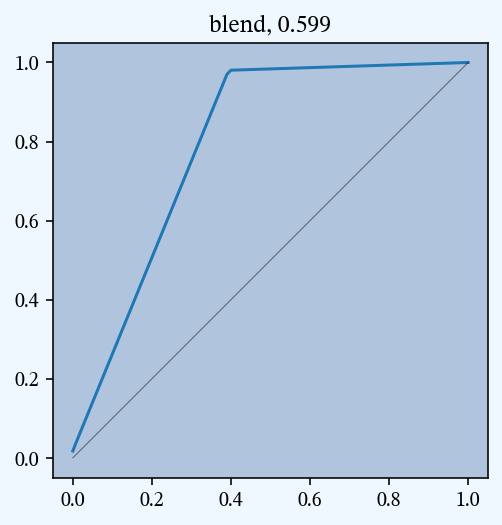

time: 110 ms (started: 2022-10-21 22:36:40 +01:00)


In [37]:
catco.dist_dict[list( catco.dist_dict.keys() )[-1]].plot(both=False)

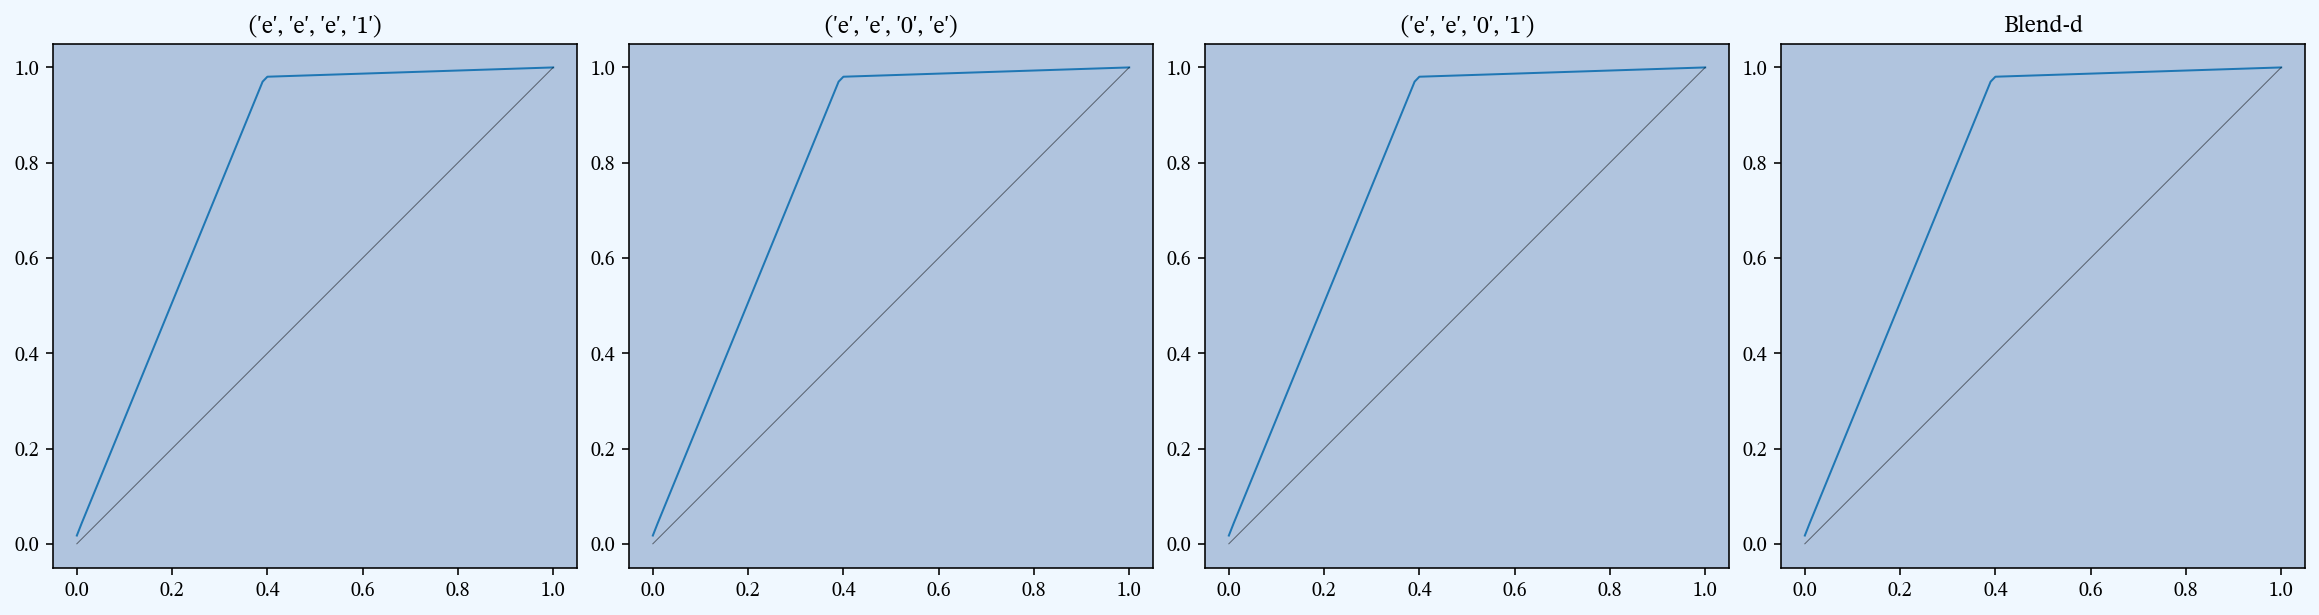

time: 500 ms (started: 2022-10-21 22:36:41 +01:00)


In [38]:
%%sf 1 4 4 4 
for k, v in catco.blend_distortions.items():
    ax = next(axi)
    v.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)
ax = next(axi)
catco.blend_d.plot(ax=ax, both=False, lw=1)
ax.set(title=
      'Blend-d')

In [ ]:
%%sf 1 4 4 4 
g = agg.Distortion('ph', 0.5)
for k, v in ans[3].items():
    ax = next(axi)
    g.g = v
    g.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)

In [27]:
catco = cs.CaseStudy()
catco.factory(case_id='CatCo',
                   case_name='CatCo Capital Model',
                   case_description='CatCo capital model calibrated to S&P',
                   a_distribution       = prog_noncat,
                   b_distribution_gross = prog_cat_gross,
                   b_distribution_net   = prog_cat_net,
                   reg_p=0.99995,      # backed into number so the net capital is correct
                   roe=0.085,
                   d2tc=0.281118428,    # to get about the right amount of debt
                   f_discrete=False, 
                   s_values=s_values,
                   gs_values=gs_values,
                   bs=1,
                   log2=18,
                   padding=1)
catco.to_json()

34:34.100|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 730.4601899196495 shape from sev_cv 0.037
34:34.100|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=6840.0 and sev_loc=19500.0
34:34.233|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.165508111353308 shape from sev_cv 1.7
34:34.234|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=40.0 and sev_loc=0
34:34.484|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.407480539427307 shape from sev_cv 2.5
34:34.485|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=100.0 and sev_loc=0
34:34.818|3037|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | ansr=inf, message no message ->
34:34.820|3042|WARNING   | aggregate.distributions, safe_integrate|  Severity.moms | splitting lognorm EX^3 integral for convergence reasons
34:35.247|3048|WARNI

time: 10.5 s (started: 2022-10-21 22:34:34 +01:00)


In [28]:
catco.full_monty()

34:49.118|2742|WARNING   | aggregate.portfolio, calibrate_distortion|  Portfolio.calibrate_distortion | Questionable convergenge! tvar, target 28493.446667553842 error 0.00013184792987885885, 200 iterations


Esscher Failed to converge after 50 iterations, value is 6.0203560105856985e-05.


35:19.534|1570|WARNING   | aggregate, show_graphs|  Check scales are reasonable...


time: 1min 8s (started: 2022-10-21 22:34:48 +01:00)


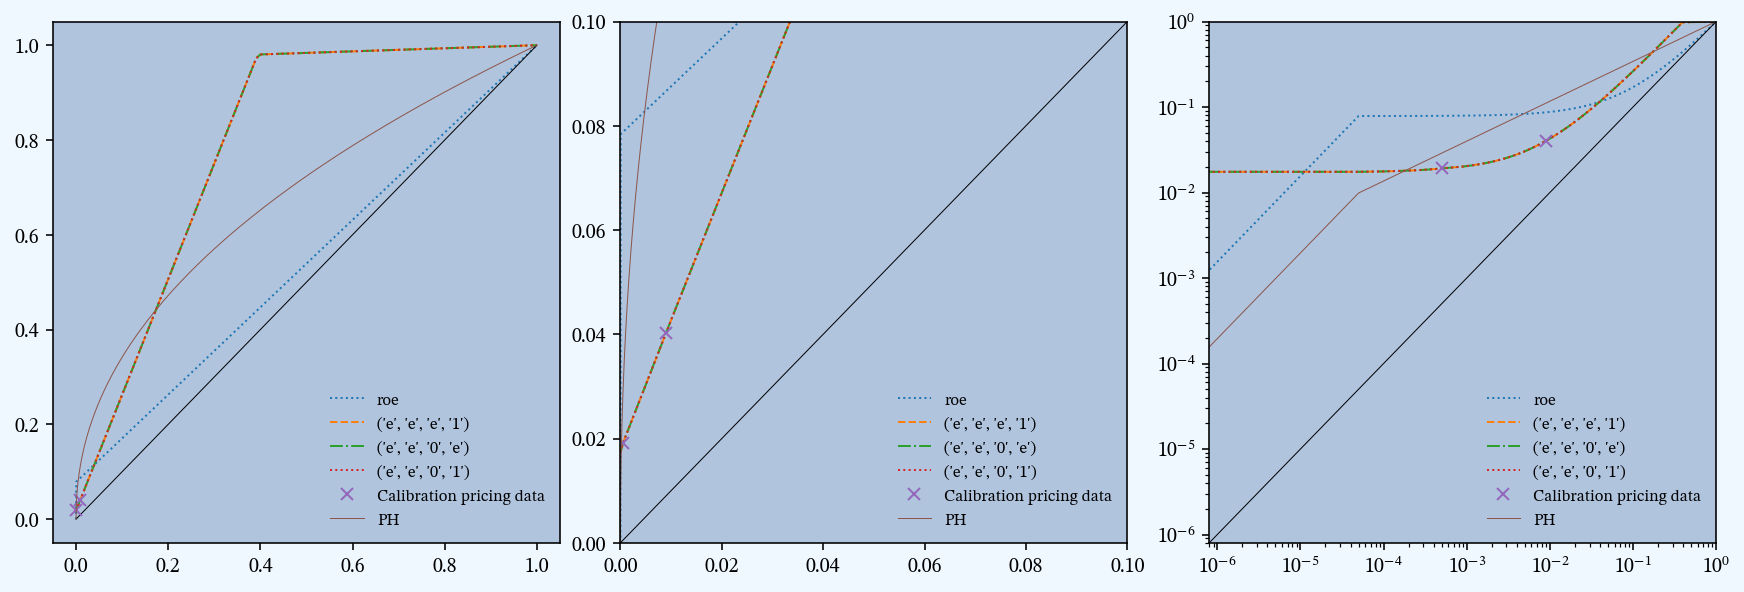

time: 3.05 s (started: 2022-10-21 22:35:57 +01:00)


In [29]:
catco.show_extended_graphs()

In [30]:
mrr = cs.ManualRenderResults(catco)

time: 0 ns (started: 2022-10-21 22:36:01 +01:00)


In [31]:
# custom for this analysis
mrr.render_custom('F', 'A', 'N', 'M', 'O', 'V', 'E', 'Z*', 'B')

time: 16 ms (started: 2022-10-21 22:36:01 +01:00)


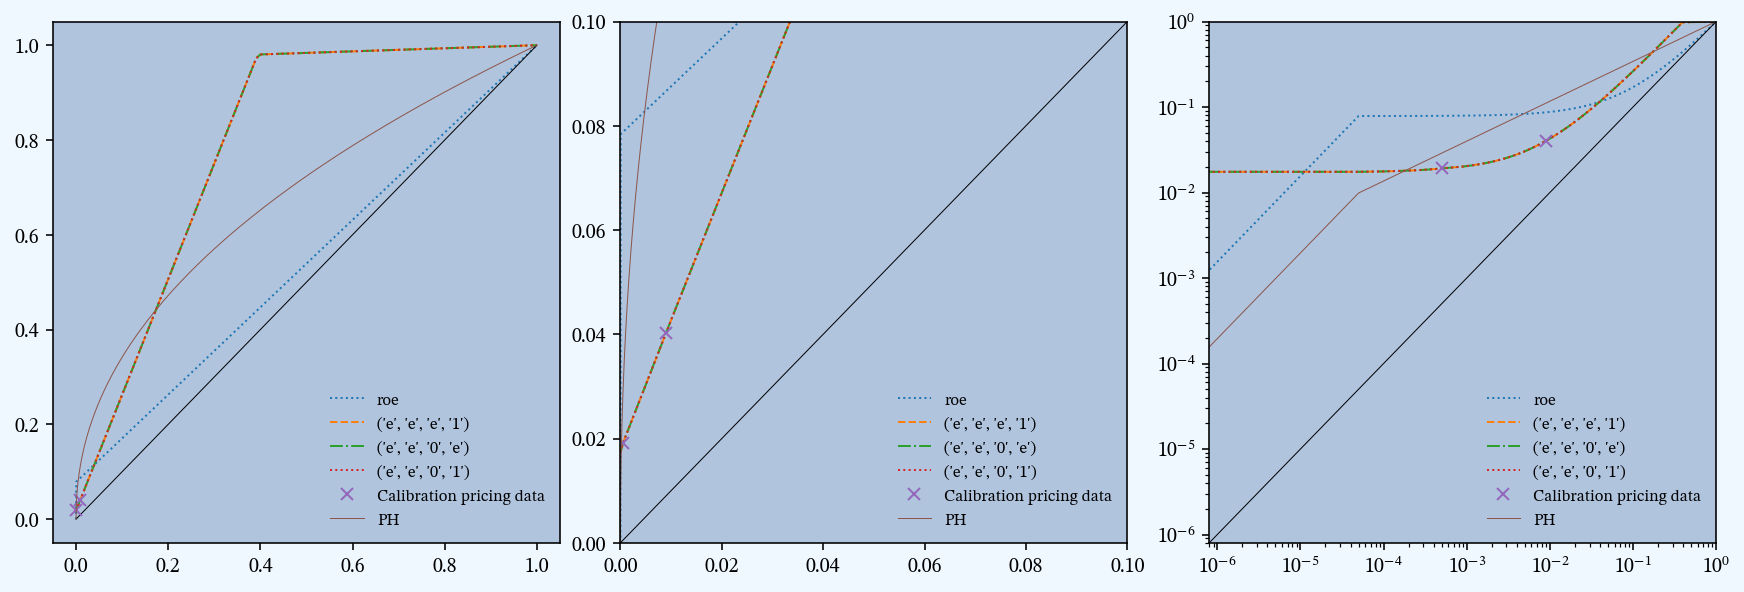

time: 3.05 s (started: 2022-10-21 22:36:01 +01:00)


In [32]:
catco.show_extended_graphs()

# Define severity as a mixture?

In [39]:
out = build('sev Atest [10 30 100 300 1000] * expon 1 wts [.4 .2 .2 .1 .1]')

36:50.913| 177|WARNING   | aggregate.underwriter, factory|  Mixed severity cannot be created, returning spec. You had [0.4, 0.2, 0.2, 0.1, 0.1], expected 1


time: 16 ms (started: 2022-10-21 22:36:50 +01:00)


In [40]:
out

{'sev_name': 'expon',
 'sev_a': 1.0,
 'sev_wt': [0.4, 0.2, 0.2, 0.1, 0.1],
 'sev_scale': array([        10,         30,        100,        300,       1000]),
 'name': 'Atest',
 'note': ''}

time: 0 ns (started: 2022-10-21 22:36:52 +01:00)


In [41]:
a = build('agg Amixed 10 claim sev.Atest poisson', log2=16, bs=.5)
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,160.000,159.999,-3.196u,2.773,2.773,3.665u,5.941
Freq,10.000,,,316.228m,,,316.228m
Agg,1.600k,1.600k,-3.197u,932.151m,932.154m,3.241u,1.861


time: 594 ms (started: 2022-10-21 22:37:00 +01:00)


In [42]:
a.report_df

view,0,1,2,3,4,independent,mixed,empirical,error
statistic,,,,,,,,,
name,Amixed,Amixed,Amixed,Amixed,Amixed,Amixed,Amixed,,
limit,inf,inf,inf,inf,inf,inf,inf,,
attachment,0,0,0,0,0,0.000,0.000,,
el,40.000,60.000,200.000,300.000,1.000k,1.600k,1.600k,,
freq_m,4.000,2.000,2.000,1.000,1.000,10.000,10.000,,
freq_cv,500.000m,707.107m,707.107m,1.000,1.000,316.228m,316.228m,,
freq_skew,500.000m,707.107m,707.107m,1.000,1.000,316.228m,316.228m,,
sev_m,10.000,30.000,100.000,300.000,1.000k,160.000,160.000,159.999,-3.196u
sev_cv,1.000,1000.000m,1.000,1000.000m,1000.000m,2.773,2.773,2.773,3.665u


time: 31 ms (started: 2022-10-21 22:37:03 +01:00)


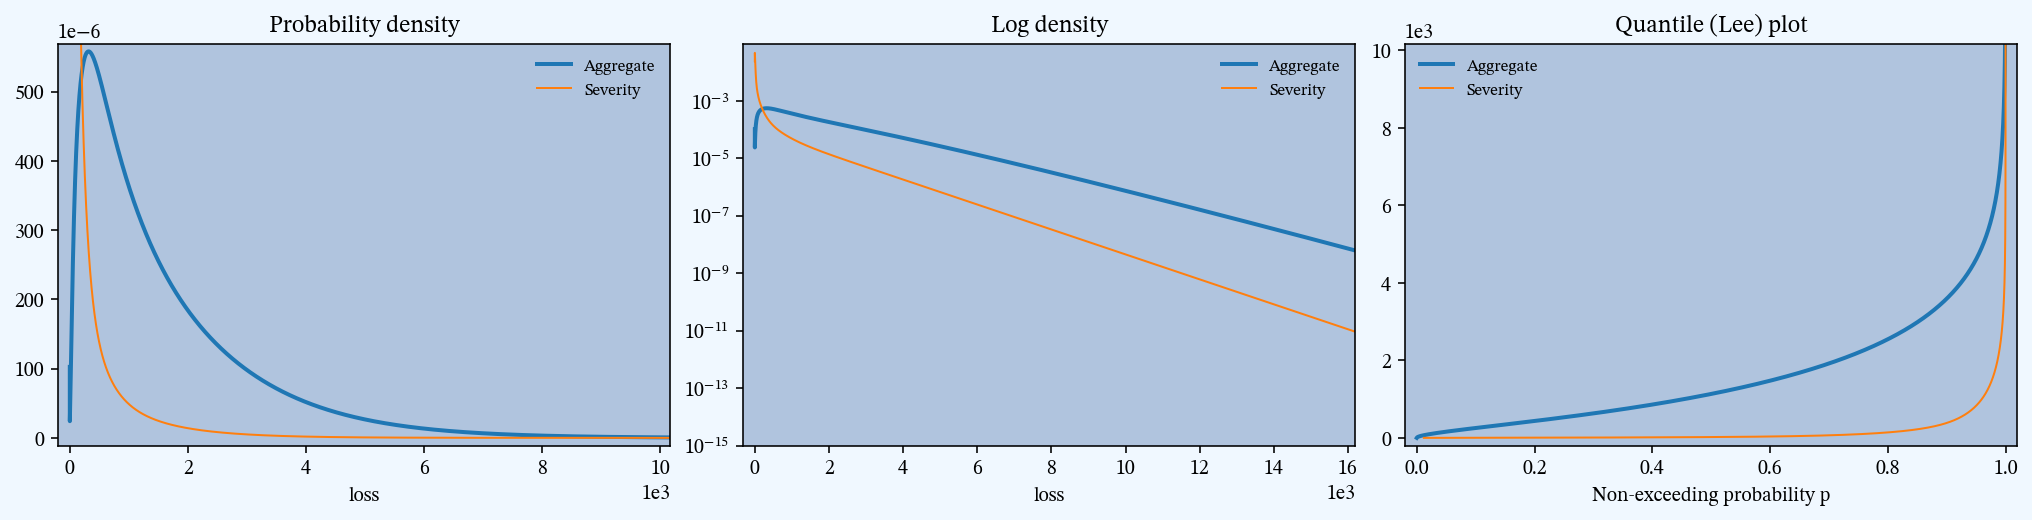

time: 1.53 s (started: 2022-10-21 22:37:06 +01:00)


In [43]:
a.plot()

In [44]:
port = catco.net

time: 0 ns (started: 2022-10-21 22:37:09 +01:00)


In [45]:
port

Non-Portfolio (enhanced) object { "name": "Net_CatCo", 'spec': [{'name': 'NC', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'CAT', 'note': '', 'occ_reins': [(1000.0, 1000.0, 400.0)], 'occ_kind': 'net of', 'agg_reins': [(1325.0, 1325.0, 2000.0)], 'agg_kind': 'net of'}], "bs": 1, "log2": 18, "padding": 1, "tilt_amount": 0, "distortion": "blend (0.599099)", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 15 ms (started: 2022-10-21 22:37:12 +01:00)


In [ ]:
sdir(port)

In [ ]:
catco.pricing_summary

In [ ]:
port.dist_ans

In [ ]:
port.distortion_information()

In [ ]:
port.distortion

In [ ]:
port.make_all(a=36743)

In [ ]:
port.multi_premium_capital([34000, 35000, 36000])

In [ ]:
port.EX_multi_premium_capital

In [ ]:
catco.gross._distortion = catco.gross.dists['ph']

In [ ]:
catco.gross.EX_distortion_information

$x \wedge x$ $\bar Q(a)$

In [ ]:
  191:         port.profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],
  195:         port.natural_profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],


In [ ]:
catco.gross.line_names

In [ ]:
catco.gross

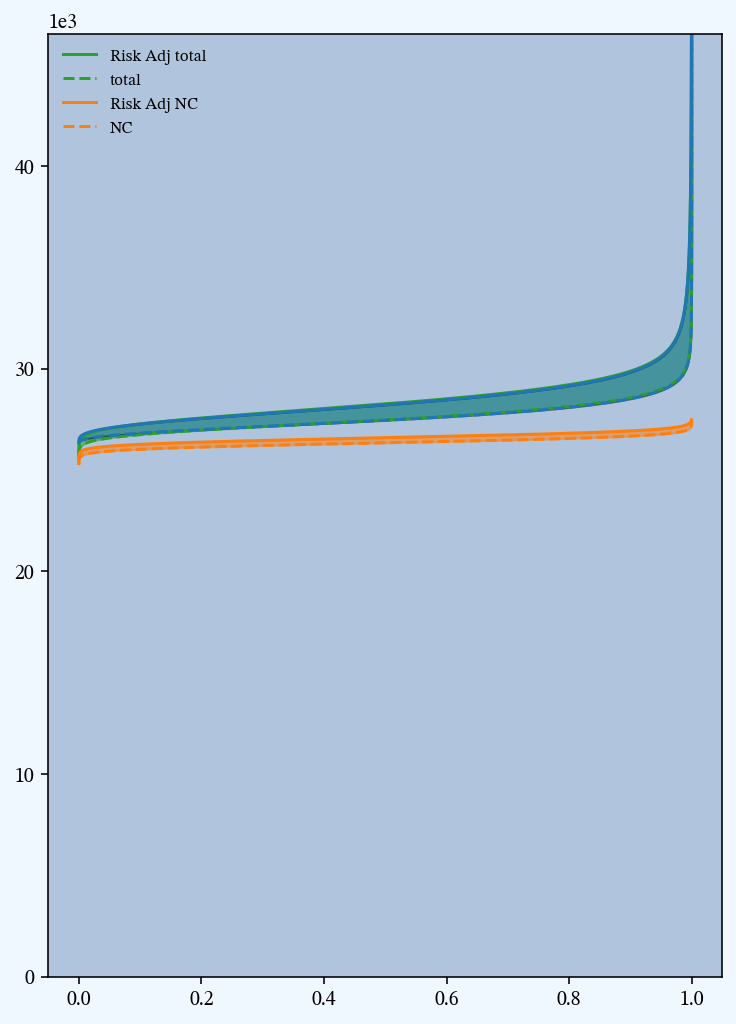

time: 250 ms (started: 2022-10-21 22:37:20 +01:00)


In [46]:
%%sf 1 1 5 7
catco.gross.profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], 
                                'wang', [2,0,1], [0, 26340, 0])

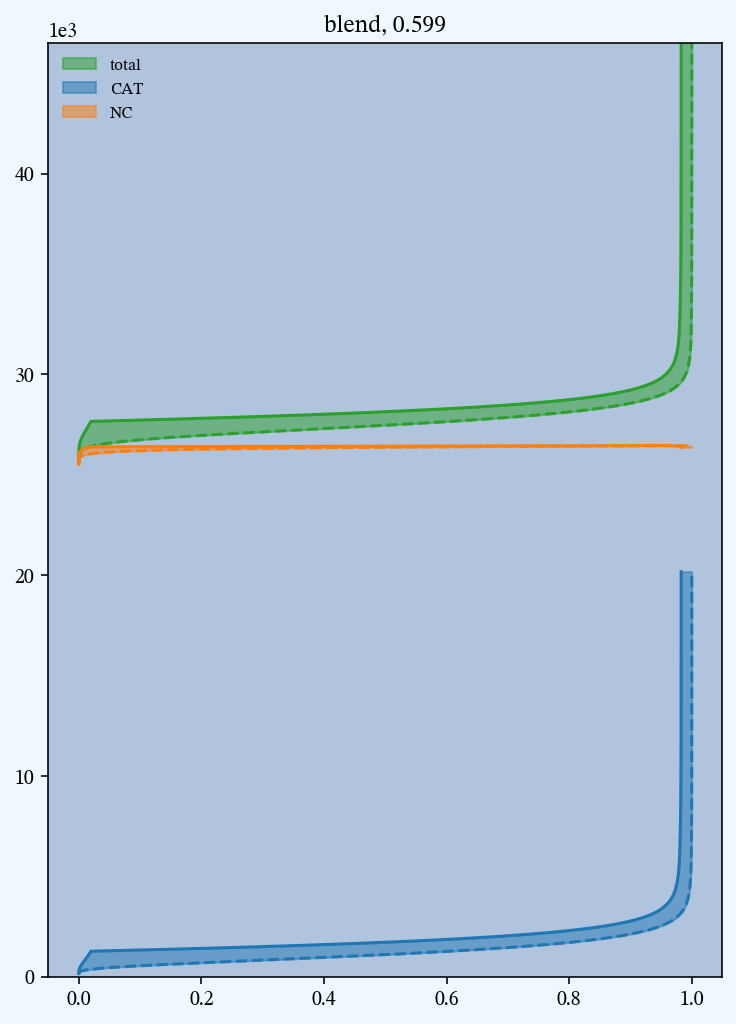

time: 266 ms (started: 2022-10-21 22:37:26 +01:00)


In [47]:
%%sf 1 1 5 7
catco.gross.natural_profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], [2,0,1], [0, 0, 0])

In [49]:
catco.gross.report_df

unit,NC,CAT,total
statistic,,,
freq_m,1.000,28.144,29.144
freq_cv,0.000,442.189m,427.017m
freq_skew,NaN,804.025m,804.025m
sev_m,26.340k,44.264,946.533
sev_cv,9.608m,2.140,5.058
sev_skew,74.000m,34.464,5.115
agg_m,26.340k,1.246k,27.586k
agg_emp_m,26.340k,1.246k,27.586k
agg_m_err,-563.882f,1.672u,73.561n


time: 31 ms (started: 2022-10-21 22:37:30 +01:00)


In [50]:
catco.gross.distortion_calibration()
catco.gross.EX_distortion_calibration

AttributeError: 'Portfolio' object has no attribute 'distortion_calibration'

time: 0 ns (started: 2022-10-21 22:37:31 +01:00)


In [51]:
port.show_enhanced_exhibits()

time: 0 ns (started: 2022-10-21 22:37:35 +01:00)


In [52]:
port.report_df

unit,NC,CAT,total
statistic,,,
freq_m,1.000,28.144,29.144
freq_cv,0.000,442.189m,427.017m
freq_skew,NaN,804.025m,804.025m
sev_m,26.340k,44.264,946.533
sev_cv,9.608m,2.140,5.058
sev_skew,74.000m,34.464,5.115
agg_m,26.340k,1.246k,27.586k
agg_emp_m,26.340k,1.140k,27.480k
agg_m_err,-563.882f,-84.963m,-3.837m


time: 31 ms (started: 2022-10-21 22:37:37 +01:00)


# Scratch 

In [53]:
out = build.write('''
port TESTA
    agg A [20 10 9 8] claims [100 200 500 1000] x 0 sev [gamma gamma lognorm lognorm] [30 35 50 60] cv [1 1.1 1.1 1.5] mixed gamma .25
''')

40:16.782|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.0 shape from sev_cv 1.0
40:16.783|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=30.0 and sev_loc=0
40:16.825|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8264462809917354 shape from sev_cv 1.1
40:16.826|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=35.0 and sev_loc=0
40:16.905|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.8905012720539266 shape from sev_cv 1.1
40:16.906|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=50.0 and sev_loc=0
40:17.052|2755|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 1.085658784490618 shape from sev_cv 1.5
40:17.053|2760|Level 31  | aggregate.distributions, __init__|  creating with sev_mean=60.0 and sev_loc=0
40:17.316| 845|WARNING   | aggregate.utilities, static_moments_t

time: 750 ms (started: 2022-10-21 22:40:16 +01:00)


In [54]:
out

{('agg',
  'A'): ({'name': 'A',
   'exp_en': [20.0, 10.0, 9.0, 8.0],
   'exp_attachment': 0.0,
   'exp_limit': [100.0, 200.0, 500.0, 1000.0],
   'sev_name': ['gamma', 'gamma', 'lognorm', 'lognorm'],
   'sev_mean': [30.0, 35.0, 50.0, 60.0],
   'sev_cv': [1.0, 1.1, 1.1, 1.5],
   'sev_wt': 1,
   'freq_name': 'gamma',
   'freq_a': 0.25,
   'note': ''}, ''),
 ('port',
  'TESTA'): (Non-Portfolio (enhanced) object { "name": "TESTA", 'spec': [{'name': 'A', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 0.125, "log2": 16, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": False, "approx_type": "slognorm", "approx_freq_ge": 100}, 'port TESTA agg A  [20 10 9 8]  claims  [100 200 500 1000]  x 0 sev  [gamma gamma lognorm lognorm]   [30 35 50 60]  cv  [1 1.1 1.1 1.5]  mixed gamma .25')}

time: 0 ns (started: 2022-10-21 22:40:38 +01:00)


In [55]:
build

time: 16 ms (started: 2022-10-21 22:40:42 +01:00)


In [61]:
port, prog = out[('port', 'TESTA')]
port

Non-Portfolio (enhanced) object { "name": "TESTA", 'spec': [{'name': 'A', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 0.125, "log2": 16, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": False, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 16 ms (started: 2022-10-21 22:42:45 +01:00)


In [73]:
port.best_bucket(18)

0.03125

time: 15 ms (started: 2022-10-21 22:46:16 +01:00)


In [74]:
port.update(16, 1/8, remove_fuzz=True)

time: 469 ms (started: 2022-10-21 22:46:16 +01:00)


In [75]:
port.A.report_df

view,0,1,2,3,independent,mixed,empirical,error
statistic,,,,,,,,
name,A,A,A,A,A,A,,
limit,100.000,200.000,500.000,1.000k,351.064,351.064,,
attachment,0.000,0.000,0.000,0.000,0.000,0.000,,
el,578.596,347.608,448.214,477.171,1.852k,1.852k,,
freq_m,20.000,10.000,9.000,8.000,47.000,47.000,,
freq_cv,335.410m,403.113m,416.667m,433.013m,198.811m,289.442m,,
freq_skew,521.749m,558.156m,566.667m,577.350m,303.907m,505.375m,,
sev_m,28.930,34.761,49.802,59.646,39.396,39.396,39.395,-520.583n
sev_cv,904.566m,1.070,1.056,1.407,1.258,1.258,1.258,1.125u


time: 31 ms (started: 2022-10-21 22:46:17 +01:00)


In [76]:
port.report_df

unit,A,total
statistic,,
freq_m,47.000,47.000
freq_cv,289.442m,289.442m
freq_skew,505.375m,505.375m
sev_m,39.396,39.396
sev_cv,1.258,1.258
sev_skew,5.455,5.455
agg_m,1.852k,1.852k
agg_emp_m,1.852k,1.852k
agg_m_err,-526.033n,-526.033n


time: 16 ms (started: 2022-10-21 22:46:20 +01:00)


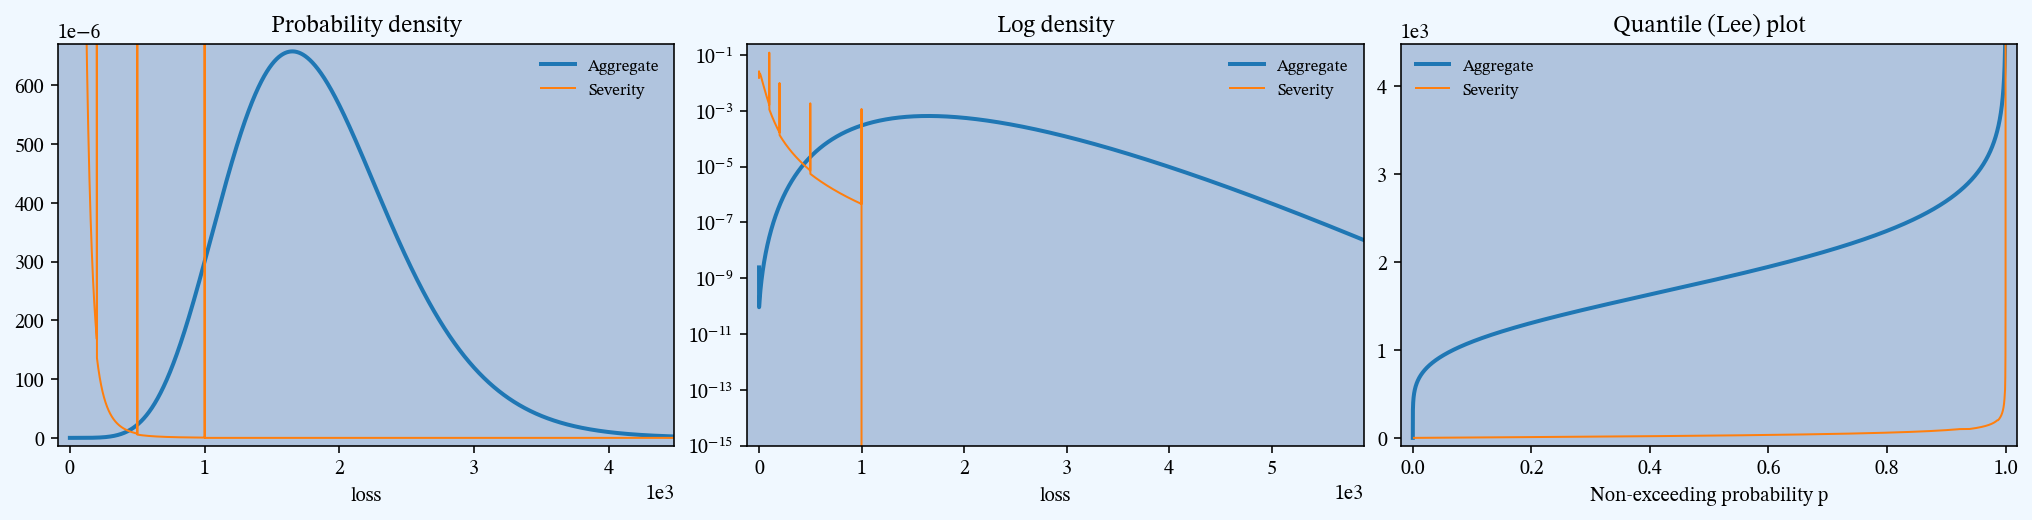

time: 1.09 s (started: 2022-10-21 22:46:23 +01:00)


In [77]:
port.A.plot()

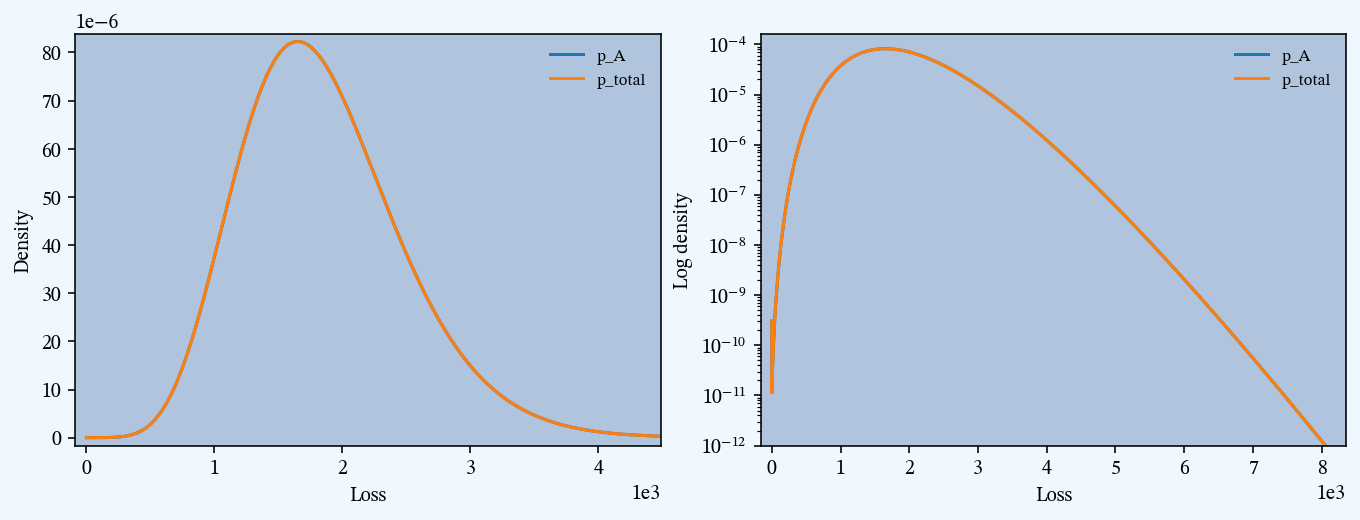

time: 1.02 s (started: 2022-10-21 22:46:25 +01:00)


In [78]:
port.plot()

In [79]:
np.exp(-47)

3.873997628687187e-21

time: 0 ns (started: 2022-10-21 22:46:42 +01:00)
